# Download necessary library

Uncomment the library if you wish to download them or keep them as a comment if you've already download them.

In [1]:
# !pip install scikit-learn
# !pip install folium
# !pip install feature-engine
# !pip install prettyTable
# !pip install xgboost
# !pip install joblib

# Import necessary library

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv("kc_house_data.csv")
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
# Check for missing values
print(df.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [5]:
# Check for duplicates
print(df.duplicated().sum())

0


# 2 - Feature Engineering
To facilitate the process of data cleaning, we need to convert each datum to its appropriate data type for further processing. After checking the data types, we can perform the necessary actions for the next steps.


## 2.1 - Terminology definition
- **Waterfront**:
    - Definition: Indicates whether the property is located on the waterfront.
    - Encoding: Often a binary indicator (e.g., 0 = not waterfront, 1 = waterfront).


- **View**:
    - Definition: Represents the quality of the view from the house.
    - Encoding: Typically encoded on an ordinal scale where higher numbers indicate a better view. For example, 0 = no view, 1 = average view, 2 = good view, etc.


- **Condition**:
    - Definition: Reflects the overall condition of the house at the time of sale.
    - Encoding: Usually an ordinal scale where higher numbers indicate better condition. For example, 1 = poor, 2 = fair, 3 = average, 4 = good, 5 = excellent.


- **Grade**:
    - Definition: Indicates the overall quality and finish of the house construction and design.
    - Encoding: Often an ordinal scale where higher numbers indicate better quality. For example, 1 = low quality, 10 = high quality.

In [6]:
print(df.dtypes)

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## 2.2 - Exploratory Data Analysis

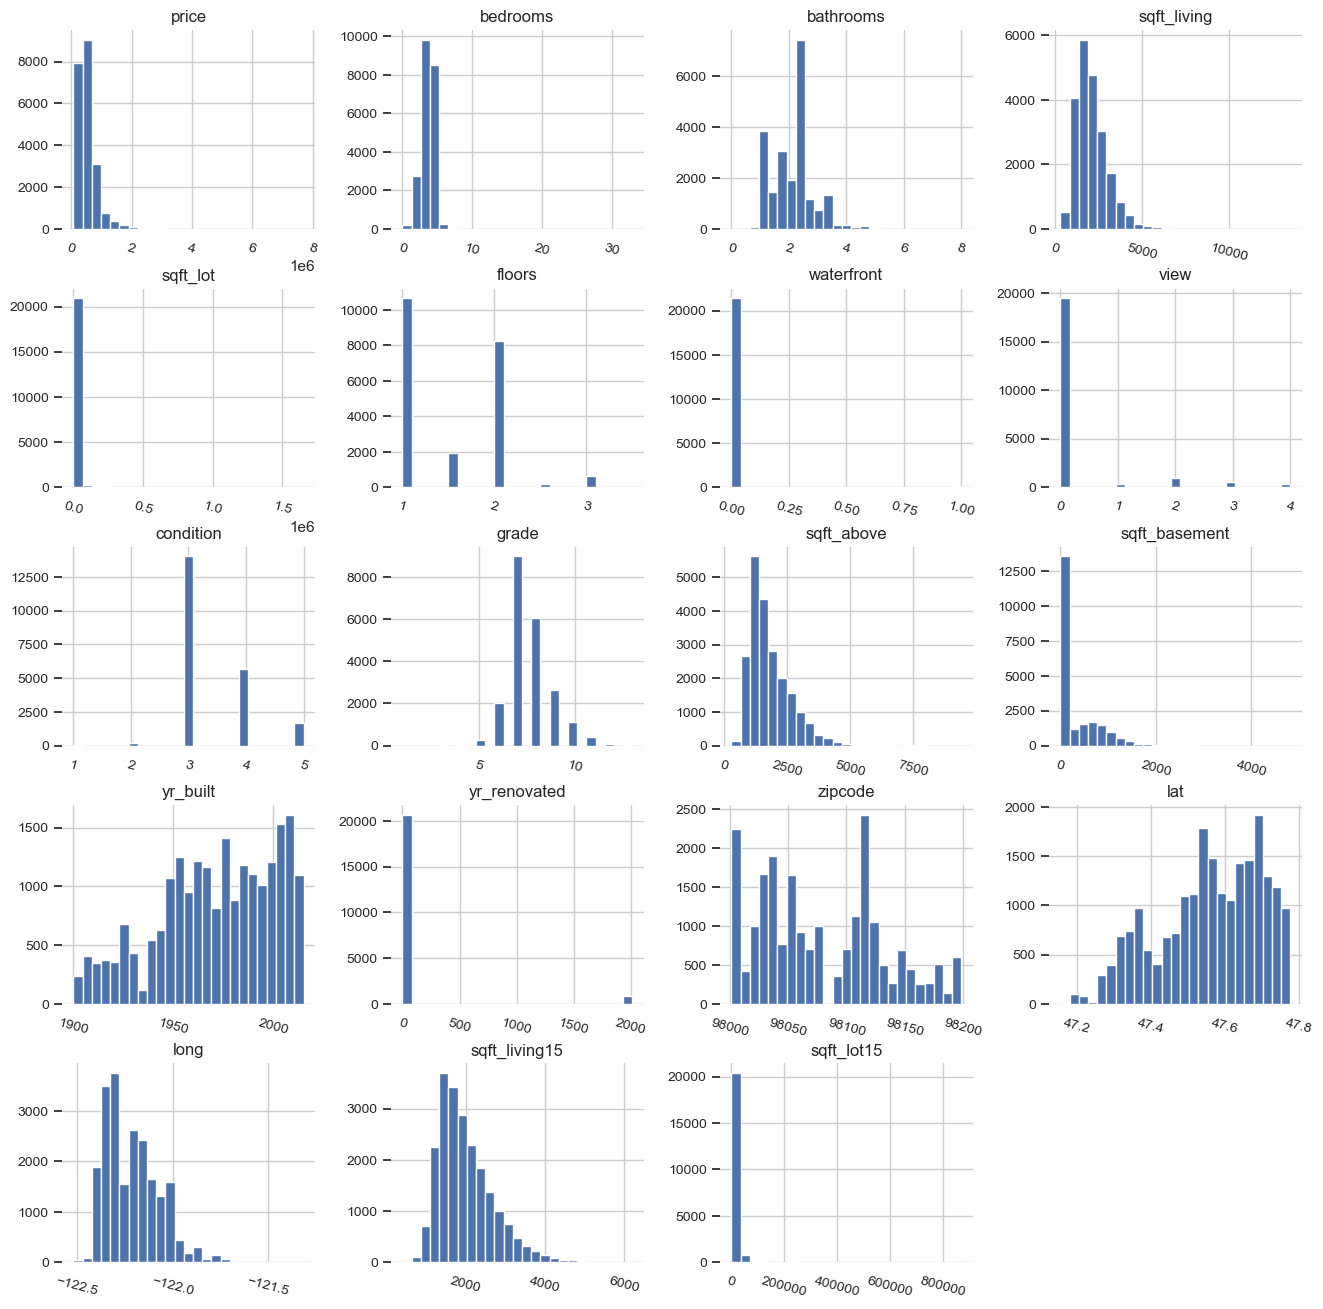

In [66]:
df1=df[['price', 'bedrooms', 'bathrooms', 'sqft_living',
    'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
    'lat', 'long', 'sqft_living15', 'sqft_lot15']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

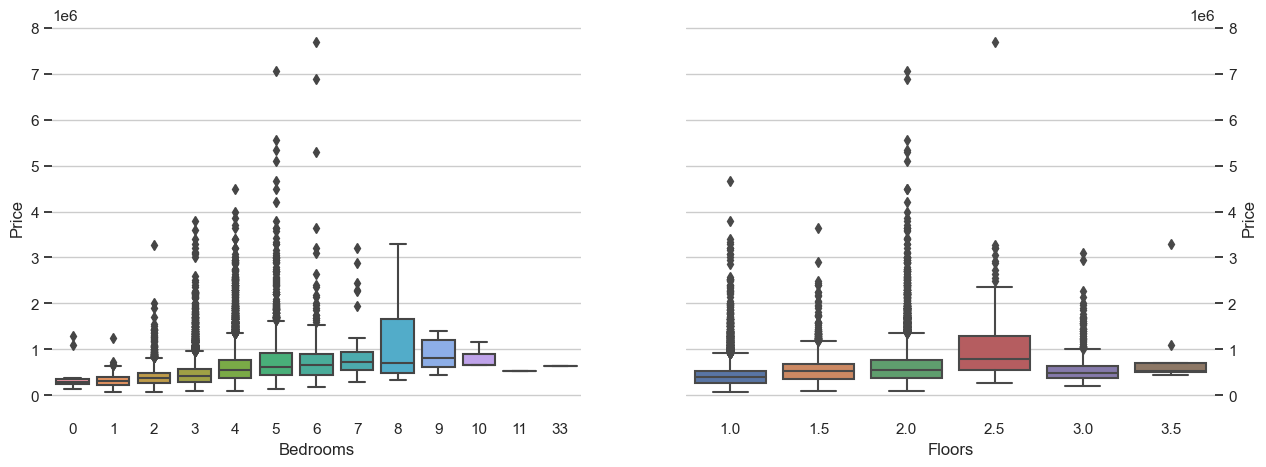

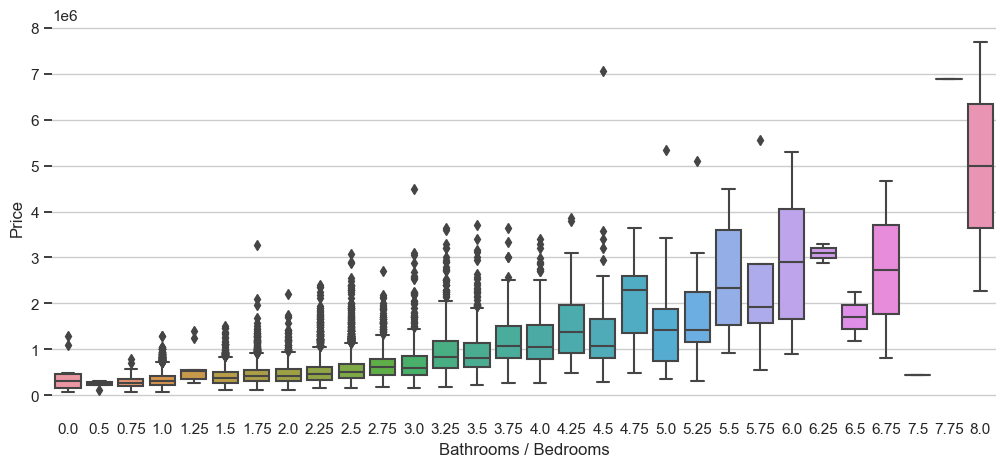

In [67]:
sns.set(style="whitegrid", font_scale=1)

f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['bedrooms'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['floors'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Bedrooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Floors', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=df['bathrooms'],y=df['price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Bathrooms / Bedrooms', ylabel='Price');

In [70]:
import folium
from folium.plugins import HeatMap

# find the row of the house which has the highest price
maxpr=df.loc[df['price'].idxmax()]

# define a function to draw a basemap easily
def generateBaseMap(default_location=[47.5112, -122.257], default_zoom_start=9.4):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

df_copy = df.copy()

df_copy['count'] = 1
basemap = generateBaseMap()
# add carton position map
folium.TileLayer('cartodbpositron').add_to(basemap)
s=folium.FeatureGroup(name='icon').add_to(basemap)
# add a marker for the house which has the highest price
folium.Marker([maxpr['lat'], maxpr['long']],popup='Highest Price: $'+str(format(maxpr['price'],'.0f')),
              icon=folium.Icon(color='green')).add_to(s)
# add heatmap
HeatMap(data=df_copy[['lat','long','count']].groupby(['lat','long']).sum().reset_index().values.tolist(),
        radius=8,max_zoom=13,name='Heat Map').add_to(basemap)
folium.LayerControl(collapsed=False).add_to(basemap)
basemap

## 2.2 - Interaction Feature

There might be some features that could interact with each other.

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_heatmap(correlation_matrix, title='Correlation Heatmap of Housing Features', figsize=(15, 12), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5):
    """
    Plots a heatmap for the given correlation matrix.
    
    Parameters:
    - correlation_matrix: DataFrame, the correlation matrix to be visualized.
    - title: str, the title of the heatmap.
    - figsize: tuple, the size of the figure.
    - annot: bool, whether to annotate the heatmap.
    - cmap: str, the colormap to use.
    - fmt: str, the string formatting code to use when adding annotations.
    - linewidths: float, the width of the lines that will divide each cell.
    """
    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap=cmap, fmt=fmt, linewidths=linewidths)
    plt.title(title, fontsize=16)
    plt.tight_layout()
    plt.show()

In [48]:
# Create new features
df['age'] = 2024 - df['yr_built']
df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1)
df['sqft_per_floor'] = df['sqft_living'] / df['floors']
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

In [ ]:
# Encoding
df['renovated'] = (df['yr_renovated'] > 0).astype(int)

In [ ]:
# Date
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek

In [61]:
# Log Transformation
# Apply log transformation to features with a wide range of values to reduce skewness.
df['log_sqft_lot'] = np.log(df['sqft_lot'] + 1)
df['log_sqft_lot15'] = np.log(df['sqft_lot15'] + 1)

print('Skewness before log transformation')
print(df[['sqft_lot', 'sqft_lot15']].skew())

print('Skewness before log transformation')
print(df[['log_sqft_lot', 'log_sqft_lot15']].skew())

KeyError: 'sqft_lot'

In [50]:
df = df.drop(columns=['sqft_lot', 'sqft_lot15', 'id', 'date'])

<Figure size 1500x1200 with 0 Axes>

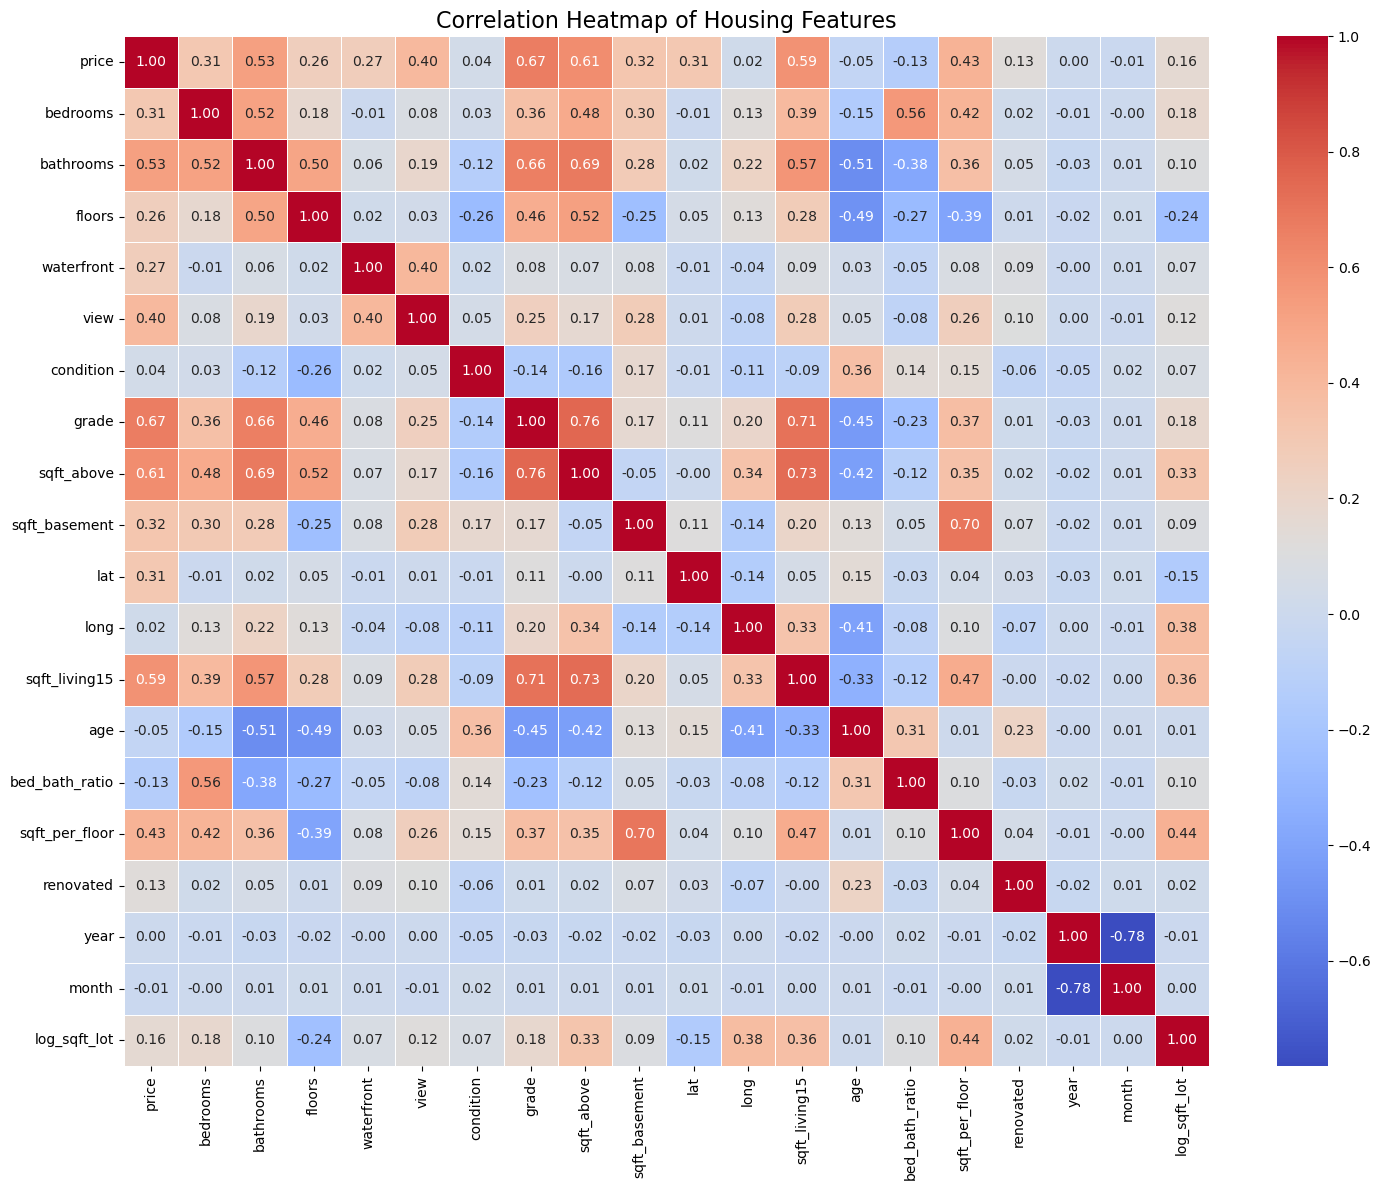

In [38]:
# Select only the columns that are not in the unwanted_columns list
unwanted_columns = ['zipcode', 'day_of_week', 'date']
selected_columns = [col for col in df.columns if col not in unwanted_columns]

plot_heatmap(df[selected_columns].corr())

# Remove highly correlated features

1. **Redundancy Reduction:** Highly correlated features provide similar information. Including them does not add value and can make the model more complex than necessary.



2. **Improving Model Performance:** Models can become overfitted when trained on redundant features. Removing correlated features helps simplify the model and improves its generalization to new data.
3. **Reducing Multicollinearity:** In regression models, multicollinearity (high correlation among independent variables) can inflate the variance of coefficient estimates, leading to unstable models. Removing correlated features mitigates this issue.

In [51]:
from feature_engine.selection import DropCorrelatedFeatures

constant_filter = DropConstantFeatures()
df = constant_filter.fit_transform(df)
removed_constant_features = constant_filter.features_to_drop_
print("Removed constant features:", removed_constant_features)

Removed constant features: []
Removed correlated features: ['yr_built', 'total_rooms', 'log_sqft_lot15', 'yr_renovated', 'sqft_living']
Remaining features after removing constants and high correlations:
['price', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'zipcode', 'lat', 'long', 'sqft_living15', 'age', 'bed_bath_ratio', 'sqft_per_floor', 'renovated', 'year', 'month', 'day_of_week', 'log_sqft_lot']


In [62]:
from feature_engine.selection import DropCorrelatedFeatures

correlated_filter = DropCorrelatedFeatures(method='pearson', threshold=0.8)
df = correlated_filter.fit_transform(df)
removed_correlated_features = correlated_filter.features_to_drop_
print("Removed correlated features:", removed_correlated_features)

Removed correlated features: []


In [ ]:
# Check remaining features
print("Remaining features after removing constants and high correlations:")
print(df.columns.tolist())

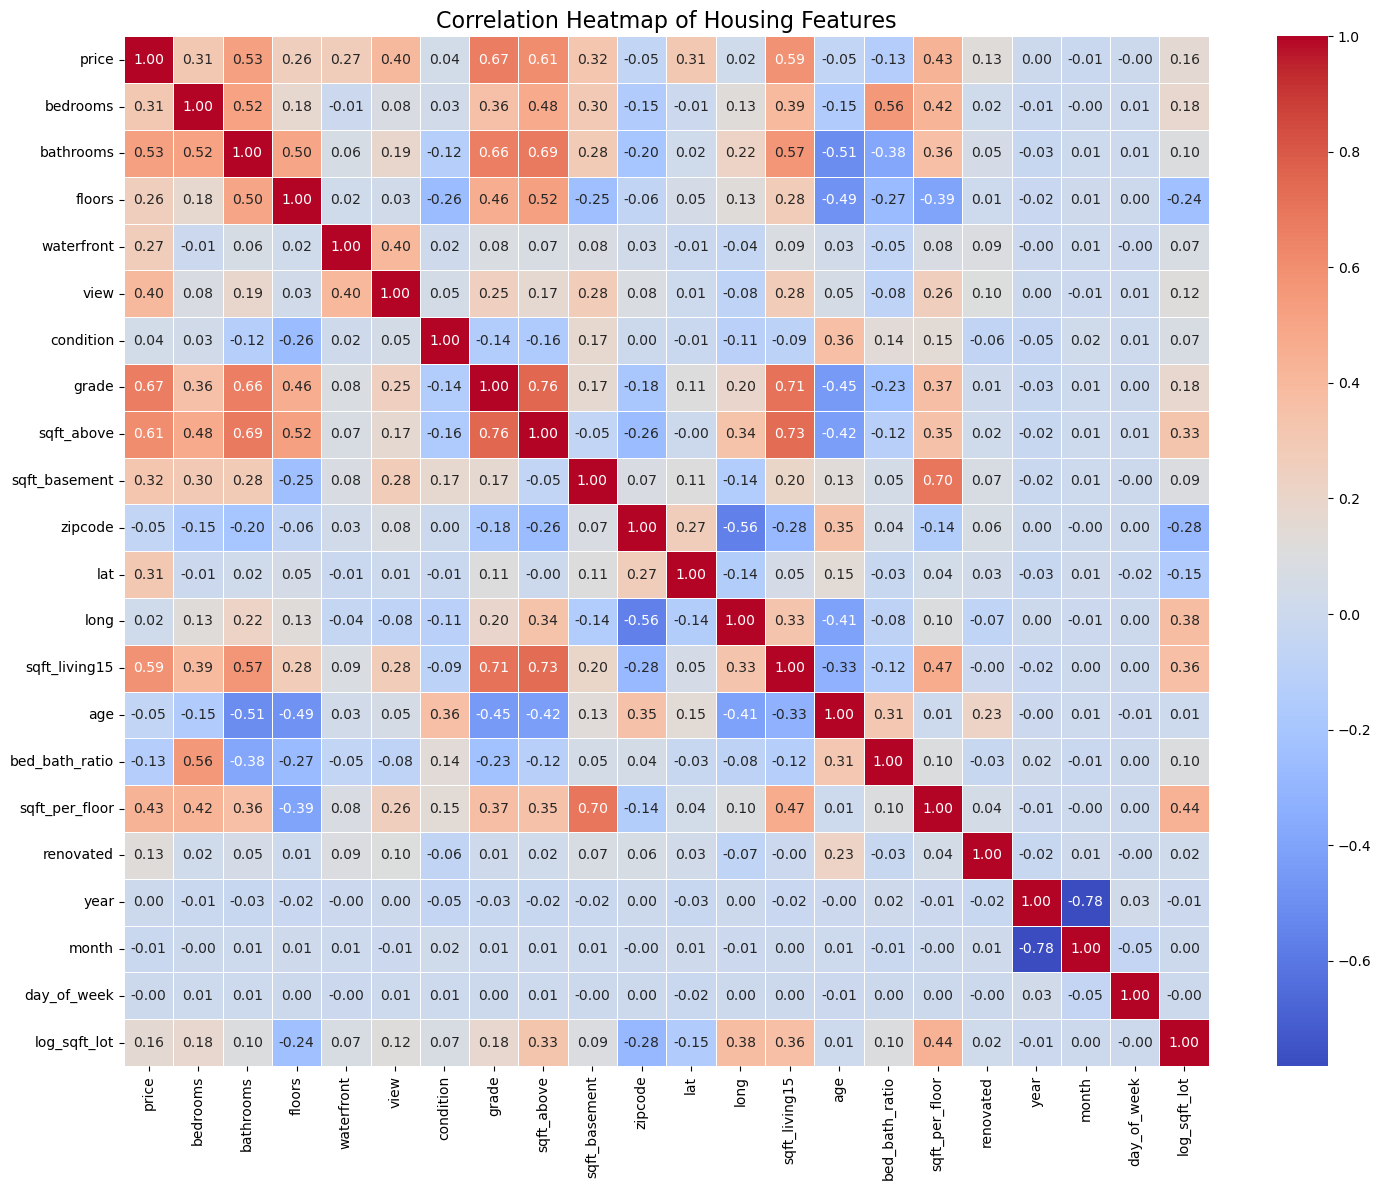

In [39]:
plot_heatmap(df.corr())

In [36]:
from feature_engine.selection import SelectBySingleFeaturePerformance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

X = df.drop(columns=['price', 'day_of_week'])
y = df['price']

# Use RandomForest to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_

# Select features based on importance
selector = SelectFromModel(rf, threshold='mean', prefit=True)
X_selected_rf = selector.transform(X)

selected_features_rf = X.columns[(selector.get_support())]
print("Selected features using Random Forest:", selected_features_rf.tolist())

# Using SelectBySingleFeaturePerformance for comparison
selector_perf = SelectBySingleFeaturePerformance(
    estimator=LinearRegression(),
    scoring='r2',  # Use R-squared as the performance metric
    threshold=0.1  # Set the threshold for correlation with the target
)

# Fit the selector
selector_perf.fit(X, y)

# Transform the data
X_selected_perf = selector_perf.transform(X)

# Print the selected features
selected_features_perf = X_selected_perf.columns
print("Selected features using Single Feature Performance:", selected_features_perf.tolist())

# Combine with the target for analysis
df_selected_rf = pd.concat([pd.DataFrame(X_selected_rf, columns=selected_features_rf), y], axis=1)
df_selected_perf = pd.concat([X_selected_perf, y], axis=1)

KeyboardInterrupt: 

In [34]:
df_selected_rf.head(5)

,grade,sqft_above,lat,long,sqft_living15,price
0,7.0,1180.0,47.5112,-122.257,1340.0,221900.0
1,7.0,2170.0,47.7210,-122.319,1690.0,538000.0
2,6.0,770.0,47.7379,-122.233,2720.0,180000.0
3,7.0,1050.0,47.5208,-122.393,1360.0,604000.0
4,8.0,1680.0,47.6168,-122.045,1800.0,510000.0


In [35]:
df_selected_perf.head()

,bathrooms,view,grade,sqft_above,sqft_basement,sqft_living15,sqft_per_floor,price
0,1.00,0,7,1180,0,1340,1180.0,221900.0
1,2.25,0,7,2170,400,1690,1285.0,538000.0
2,1.00,0,6,770,0,2720,770.0,180000.0
3,3.00,0,7,1050,910,1360,1960.0,604000.0
4,2.00,0,8,1680,0,1800,1680.0,510000.0


In [ ]:
plt.figure(figsize=(15, 12))

# Select only the columns that are not in the unwanted_columns list
selected_columns = ['price', 'grade', 'zipcode', 'sqft_living15', 'age', 
                    'bathrooms sqft_living', 'view', 'sqft_basement', 'sqft_per_floor', 'total_rooms']

# Define the correlation matrix
correlation_matrix = df[selected_columns].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Housing Features', fontsize=16)
plt.tight_layout()
plt.show()

'sqft_living' has a **strong positive correlation** with 'price' (0.70), indicating that as the square footage of the living area increases, the price of the house tends to increase.

'grade' also has a **strong positive correlation** with 'price' (0.67), suggesting that higher grades assigned to the house positively influence its price.

'sqft_above' (square footage above ground) has a **moderate positive correlation** with 'price' (0.61), implying that larger above-ground living areas tend to be associated with higher prices.

'sqft_living15' (average square footage of interior living space of the 15 closest neighbouring properties) has a **moderate positive correlation** with 'price' (0.59), implying that larger average square footage of interior living space tend to be associated with higher prices.

'bathrooms' has a **moderate positive correlation** with 'price' (0.53), indicating that the number of bathrooms in a house is positively associated with its price.

I'm wonder the relationship between the zipcode and price. So I'm using scatter plot and bar plot to study it first before using any statistical toolkit.

In [ ]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Scatter plot - House Prices by Zipcode
axes[0].scatter(df['zipcode'], df['price'], alpha=0.5)
setup_subplot(axes[0], 'House Prices by Zipcode', 'Zipcode', 'Price')

# Bar plot - Average House Prices by Zipcode
df.groupby('zipcode')['price'].mean().plot(kind='bar', ax=axes[1])
setup_subplot(axes[1], 'Average House Prices by Zipcode', 'Zipcode', 'Price')

plt.tight_layout()
plt.show()

In [ ]:
# Bar plot
plt.figure(figsize=(12, 8))
df.groupby('day_of_week')['price'].mean().reindex(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']).plot(kind='bar')
plt.title('Average House Prices by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(day_of_week)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

- **Null hypothesis**: There is no significant difference in the average house price between each day of the week.
- **Alternative hypothesis**: There is a significant difference in the average house price between each day of the week.

Since the p-value (PR(>F)) is 0.611, which is greater than 0.05, we fail to reject the null hypothesis. Therefore, there is no significant difference in the average house price between each day of the week.

In [41]:
def setup_subplot(axs, title, xlabel, ylabel, grid=True, type='bar'):
    axs.set_title(title)
    axs.set_xlabel(xlabel)
    axs.set_ylabel(ylabel)
    axs.grid(grid)

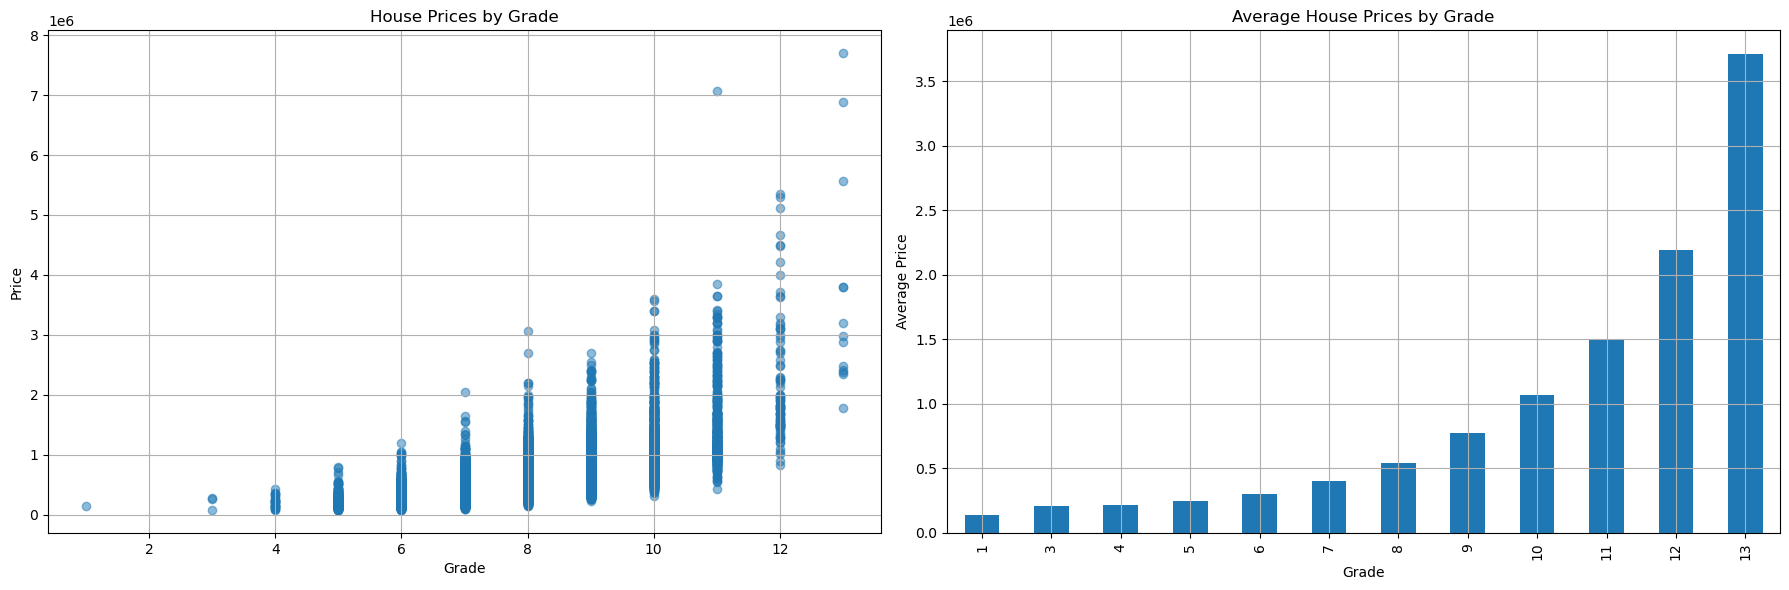

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Scatter plot - House Prices by Grade
axes[0].scatter(df['grade'], df['price'], alpha=0.5)
setup_subplot(axes[0], 'House Prices by Grade', 'Grade', 'Price')

# Bar plot - Average House Prices by Grade
df.groupby('grade')['price'].mean().plot(kind='bar', ax=axes[1])
setup_subplot(axes[1], 'Average House Prices by Grade', 'Grade', 'Average Price')

plt.tight_layout()
plt.show()

In [ ]:
model = ols('price ~ C(grade)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

- **Null hypothesis**: There is no significant difference in the average house price between each grade.
- **Alternative hypothesis**: There is a significant difference in the average house price between each grade.

Since the p-value (PR(>F)) is 0.0, which is smaller than 0.05, we accept the null hypothesis. Therefore, there is a significant difference in the average house price between each grade.

In [ ]:
# Based on the result in ANOVA test, we could remove Day of Week columns
df.drop(['day_of_week', 'date'], axis=1, inplace=True)
print(df.columns.tolist())


# **Visualization**

The data distribution is examined using libraries such as `Seaborn` and `matplotlib`. These tools help in visually assessing how the data is spread across different variables.

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


KeyError: 'sqft_living'

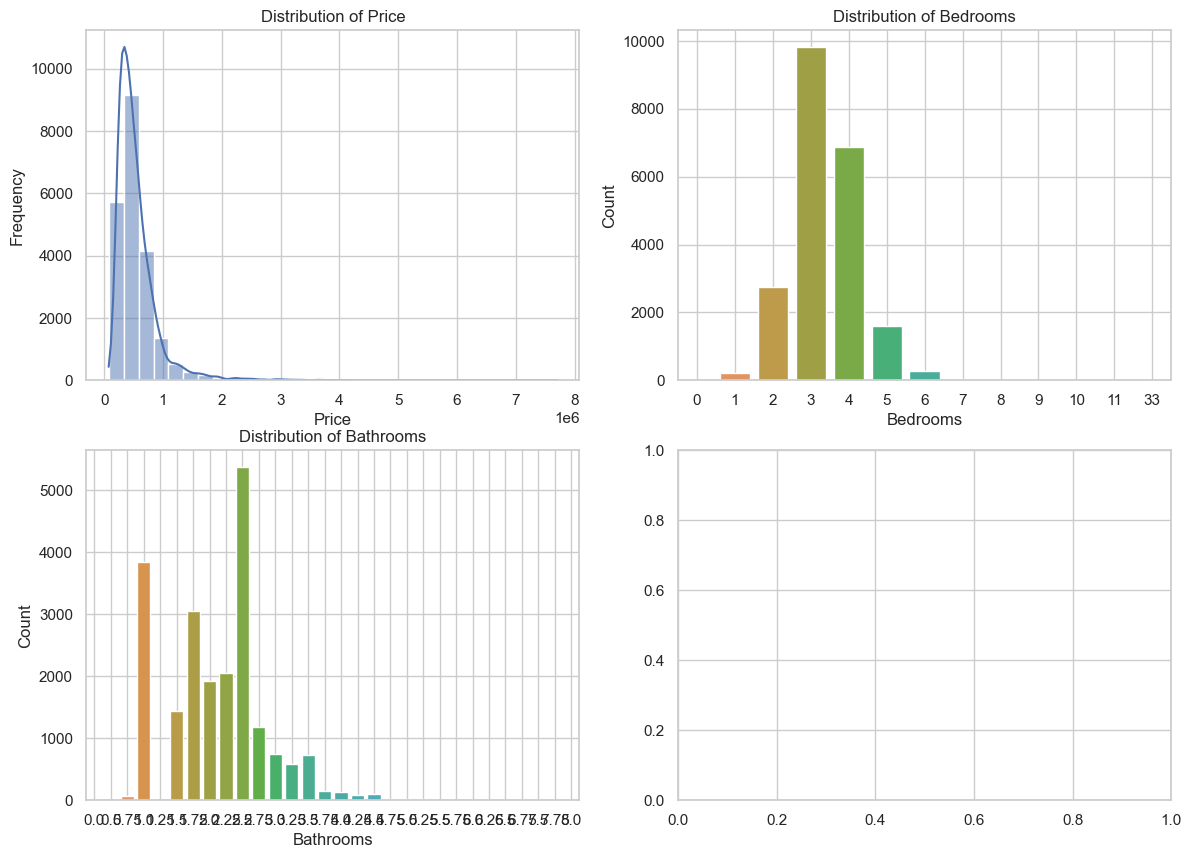

In [44]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

sns.histplot(df['price'], bins=30, ax=axes[0, 0], kde=True)
setup_subplot(axes[0, 0], 'Distribution of Price', 'Price', 'Frequency')

sns.countplot(x='bedrooms', data=df, ax=axes[0, 1])
setup_subplot(axes[0, 1], 'Distribution of Bedrooms', 'Bedrooms', 'Count')

sns.countplot(x='bathrooms', data=df, ax=axes[1, 0])
setup_subplot(axes[1, 0], 'Distribution of Bathrooms', 'Bathrooms', 'Count')

sns.histplot(df['sqft_living'], bins=30, ax=axes[1, 1], kde=True)
setup_subplot(axes[1, 1], 'Distribution of Sqft Living', 'Sqft Living', 'Frequency')

plt.tight_layout()
plt.show()

Visualizing Relationships with Heatmap:

'sqft_living' has a **strong positive correlation** with 'price' (0.70), indicating that as the square footage of the living area increases, the price of the house tends to increase.

'grade' also has a **strong positive correlation** with 'price' (0.67), suggesting that higher grades assigned to the house positively influence its price.

'sqft_above' (square footage above ground) has a **moderate positive correlation** with 'price' (0.61), implying that larger above-ground living areas tend to be associated with higher prices.

'sqft_living15' (average square footage of interior living space of the 15 closest neighbouring properties) has a **moderate positive correlation** with 'price' (0.59), implying that larger average square footage of interior living space tend to be associated with higher prices.

'bathrooms' has a **moderate positive correlation** with 'price' (0.53), indicating that the number of bathrooms in a house is positively associated with its price.

 Plot geographical data on maps to explore spatial relationships between location (latitude and longitude) and house prices.

## **Checking for outliers**

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Boxplot for price
sns.boxplot(x=df['price'], ax=axes[0])
axes[0].set_title('Boxplot of Price')

# Boxplot for sqft_living
sns.boxplot(x=df['sqft_living'], ax=axes[1])
axes[1].set_title('Boxplot of Sqft Living')

# Boxplot for bedrooms
sns.boxplot(x=df['bedrooms'], ax=axes[2])
axes[2].set_title('Boxplot of Bedrooms')

plt.tight_layout()
plt.show()

In [ ]:
selected_columns

In [ ]:
from feature_engine.outliers import OutlierTrimmer

selected_columns = ['price', 'grade', 'zipcode', 'sqft_living15', 'age', 
                    'bathrooms sqft_living', 'view', 'sqft_basement', 'sqft_per_floor', 'total_rooms']

# Exclude columns with low variation
columns_to_exclude = ['view']
columns_for_outlier_removal = [col for col in selected_columns if col not in columns_to_exclude]

# Visualize before removing outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Before: {column}')

# Using feature-engine to remove outliers
trimmer = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=columns_for_outlier_removal)
df_no_outliers = trimmer.fit_transform(df)
df = df_no_outliers

# Visualize after removing outliers
plt.figure(figsize=(16, 8))
for i, column in enumerate(selected_columns, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(f'After: {column}')

plt.tight_layout()
plt.show()

# Print the number of rows before and after outlier removal
print("Number of rows before outlier removal:", len(df))
print("Number of rows after outlier removal:", len(df_no_outliers))

# Predictive Analytics


### **Import Necessary Libraries**

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### **Hypothesis Testing**

#### Hypothesis 1: Does the number of bedrooms affect the price?

In [ ]:
model = ols('price ~ bedrooms', data=df).fit()
print(model.summary())

#### Hypothesis 2: Does having a waterfront view affect the price?

In [ ]:
model = ols('price ~ waterfront', data=df).fit()
print(model.summary())

#### Hypothesis 3: Does the year built affect the price?


In [ ]:
model = ols('price ~ age', data=df).fit()
print(model.summary())

### **Predictive Analysis**

Using Linear Regression and Decision Tree models

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
# import xgboost as xgb

In [10]:
# Feature selection
# X = df[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'zipcode', 'age','renovated']]
X = df[['grade', 'zipcode', 'sqft_living15', 'age', 'view', 'sqft_basement', 'sqft_per_floor']]
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['age', 'sqft_per_floor'] not in index"

In [11]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# import xgboost as xgb

model_list = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1),
    'Lasso': Lasso(alpha=1),
    'PolynomialFeatures': PolynomialFeatures(degree=2),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    # 'XGBoost': xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
}    

In [12]:
models = []

for name, model in model_list.items():
    if name == 'PolynomialFeatures':
        # Apply PolynomialFeatures transformation
        X_train_poly = model.fit_transform(X_train)
        X_test_poly = model.transform(X_test)
        linear_reg = LinearRegression()
        linear_reg.fit(X_train_poly, y_train)
        models.append({'name': name, 'result': linear_reg.predict(X_test_poly)})
    else:
        model.fit(X_train, y_train)
        models.append({'name': name, 'result': model.predict(X_test)})

NameError: name 'X_train' is not defined

In [75]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
from prettytable import PrettyTable

def evaluate_model(y_test, y_pred):
    """Evaluate regression model metrics."""
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'Median Absolute Error': medae,
        'R2': r2
    }
    return metrics

# Initialize PrettyTable
table = PrettyTable()
table.field_names = ["Model", "MSE", "RMSE", "MAE", "MAPE", "Median Absolute Error", "R2"]

# Model Evaluation
for model_info in models:
    name = model_info['name']
    y_pred = model_info['result']
    metrics = evaluate_model(y_test, y_pred)
    table.add_row([name] + [f"{value:.2e}" for value in metrics.values()])

# Print the table
print(table)


+--------------------+----------+----------+----------+----------+-----------------------+----------+
|       Model        |   MSE    |   RMSE   |   MAE    |   MAPE   | Median Absolute Error |    R2    |
+--------------------+----------+----------+----------+----------+-----------------------+----------+
| Linear Regression  | 6.27e+10 | 2.50e+05 | 1.53e+05 | 3.12e-01 |        1.09e+05       | 5.85e-01 |
|       Ridge        | 6.27e+10 | 2.50e+05 | 1.53e+05 | 3.12e-01 |        1.09e+05       | 5.85e-01 |
|       Lasso        | 6.27e+10 | 2.50e+05 | 1.53e+05 | 3.12e-01 |        1.09e+05       | 5.85e-01 |
| PolynomialFeatures | 5.04e+10 | 2.24e+05 | 1.38e+05 | 2.71e-01 |        9.32e+04       | 6.67e-01 |
|   Decision Tree    | 6.21e+10 | 2.49e+05 | 1.27e+05 | 2.25e-01 |        6.80e+04       | 5.89e-01 |
|   Random Forest    | 3.41e+10 | 1.85e+05 | 9.72e+04 | 1.78e-01 |        5.16e+04       | 7.75e-01 |
|      XGBoost       | 7.56e+10 | 2.75e+05 | 1.67e+05 | 3.66e-01 |        1.30e+05

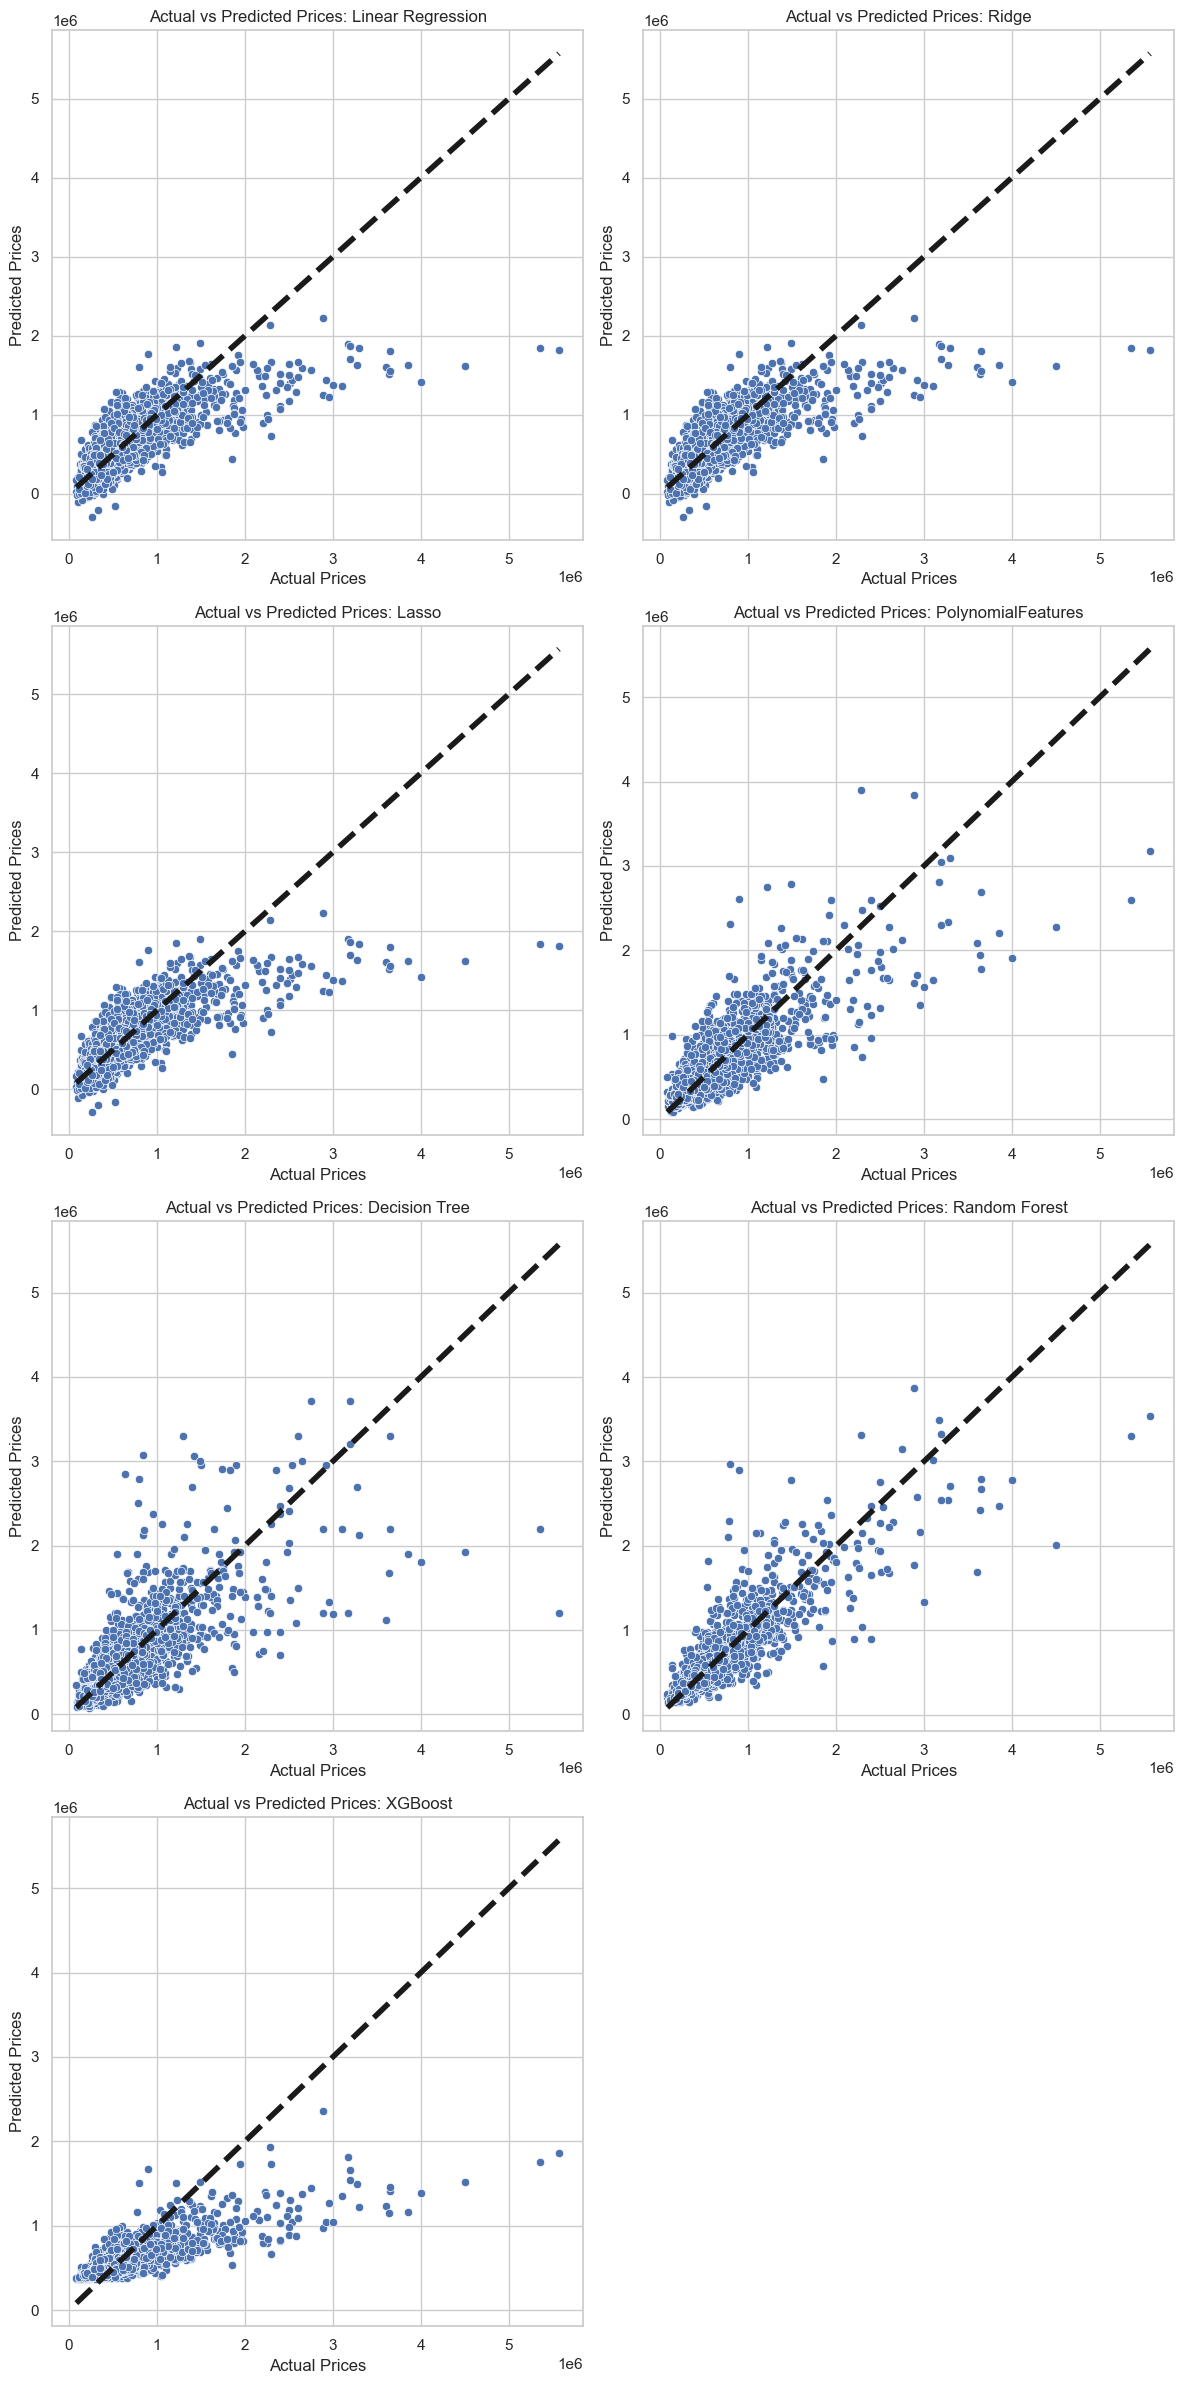

In [82]:
import math

num_models = len(models)
# Calculate the number of rows and columns needed
cols = 2
rows = math.ceil(num_models / cols)


# Visualization of Model Performance
plt.figure(figsize=(12, rows * 6))

# Actual vs Predicted Prices for each model
for i, model_info in enumerate(models, 1):
    name = model_info['name']
    y_pred = model_info['result']
    plt.subplot(rows, cols, i)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
    plt.title(f'Actual vs Predicted Prices: {name}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')

plt.tight_layout()
plt.show()


### Reporting

In [ ]:
# Save the cleaned data
df.to_csv('cleaned_housing_data.csv', index=False)

In [ ]:
# Save the model performance metrics
metrics = {
    'Model': [],
    'MSE': [],
    'R2': []
}

for name, (y_pred, model) in models.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics['Model'].append(name)
    metrics['MSE'].append(mse)
    metrics['R2'].append(r2)

metrics_df = pd.DataFrame(metrics)
metrics_df.to_csv('model_performance_metrics.csv', index=False)

# Display the metrics
print(metrics_df)

- **Mean Squared Error (MSE)**: This metric measures the average of the squares of the errors, i.e., the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.
- **$R^2$ Score**: This metric represents the proportion of the variance in the dependent variable that is predictable from the independent variables. A higher $R^2$ score indicates a better fit of the model to the data.

#### Analysis
Based on the model performance metrics,
- The **Gradient Boosting** model has the lowest MSE of $4.706252 \times 10^{10}$. A lower MSE means that the model's predictions are closer to the actual values, meaning it has better accuracy.
- The **Gradient Boosting** model has the highest $R^2$ value of 0.996887. An $R^2$ value closer to 1 means the model explains a higher proportion to the variance, indicating better performance.

#### Conclusion
The **Gradient Boosting** model is the most suitable model for predicting house prices due to its lowest MSE and highest $R^2$ value.

### Model Preparation

In [13]:
import joblib

joblib.dump(model_list['Random Forest'], 'rf.pkl')

['rf.pkl']